In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/

/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI


In [ ]:
!pwd

/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI


In [ ]:
from GraphicManager import GraphicManager
from GestuReNN_mts import GestuReNN_GRU #GestuReNN_mts_without_regression as GestuReNN
from DataLoader import DataLoader
import numpy as np
import time
import json

import tensorflow as tf
print('no. of gpus  ', tf.config.experimental.list_physical_devices("GPU"))


# test on old recognition dataset
class Parameters:
    pad = True
    include_fingerup = True
    use_tangents = True
    test_size = 0.2
    method = 'G3'
    dataset = 'Napkin'
    load_mode = 'test'
    augmentFactor = 0
    datasetFolder = '/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/dataset/NapkinData/test'
    fileType = 'json'
    labelJsonPath = '/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/dataset/NapkinData/test/labelDict_11_classes.json'
    batchSize = 128
    excludeClasses = ['line']
    modelPath = '/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/checkpoints/models/Napkin_latest'

# test on test set
# class Parameters:
#     pad = True
#     include_fingerup = True
#     use_tangents = True
#     test_size = 0.2
#     method = 'G3'
#     dataset = 'Napkin'
#     load_mode = 'test'
#     augmentFactor = 0
#     datasetFolder = '/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/dataset/NapkinData/TestCSV'
#     fileType = 'csv'
#     labelJsonPath = '/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/dataset/NapkinData/test/labelDict_11_classes.json'
#     batchSize = 128
#     excludeClasses = ['line']
#     modelPath = '/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/checkpoints/models/Napkin_latest'

# test on validation set of training data
# class Parameters:
#     pad = True
#     include_fingerup = True
#     use_tangents = True
#     test_size = 0.2
#     method = 'G3'
#     dataset = 'Napkin'
#     load_mode = 'validation'
#     augmentFactor = 0
#     datasetFolder = '/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/dataset/NapkinData/NewTrainSet/csv'
#     fileType = 'csv'
#     labelJsonPath = '/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/dataset/NapkinData/test/labelDict_11_classes.json'
#     batchSize = 128
#     excludeClasses = ['line']
#     modelPath = '/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/checkpoints/models/Napkin_latest'


# train on Napkin dataset.
# class Parameters:
#     pad = True
#     include_fingerup = True
#     use_tangents = True
#     test_size = 0.2
#     method = 'G3'
#     dataset = 'Napkin'
#     load_mode = 'train'
#     augmentFactor = 3
#     datasetFolder = '/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/dataset/NapkinData/NewTrainSet/csv'
#     fileType = 'csv'
#     labelJsonPath = '/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/dataset/NapkinData/test/labelDict_11_classes.json'
#     topology = 'mts'
#     batchSize = 64
#     excludeClasses = ['line']
#     modelPath = '/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/checkpoints/models/Napkin_latest'



p = Parameters()

no. of gpus   []


In [ ]:
# Data loading
dl = DataLoader(dataset=p.dataset, load_mode=p.load_mode, labelJsonPath=p.labelJsonPath, datasetFolder=p.datasetFolder,
                fileType=p.fileType, include_fingerup=p.include_fingerup, use_tangents=p.use_tangents, augmentFactor=p.augmentFactor, excludeClasses=p.excludeClasses)

print(dl.validation_set_classifier[0].shape)
print(dl.train_set_classifier[0].shape)
for k, v in dl.labels_dict.items():
    print('{} - {}'.format(v, k))


Starting the DataLoader construction ...
stroke_dataset - Napkin
.. Done with attribute settings. Loading the data ...
.. Done with data loading. Setting up classifier attributes ...
.. Done with classifier attributes. Setting up regressor attributes ...
Done with DataLoader construction!
(46, 25, 5)
(46, 25, 5)
0 - arrow_head
1 - triangle
2 - rectangle
3 - bracket
4 - small_cross
5 - arrow
6 - ellipse
7 - dot
8 - circle
9 - curly_braces
10 - garbage


/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/DataLoader.py:187: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x, y = np.array(x), np.array(y)
/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/DataLoader.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)


In [ ]:
# with open(p.labelJsonPath, 'w') as fp:
#         json.dump(dl.labels_dict, fp)

In [ ]:
# model initialization.
model_mts = GestuReNN_GRU(plot=False, labelJsonPath=p.labelJsonPath,
                      batch_size=p.batchSize, model_path=p.modelPath, include_fingerup=p.include_fingerup, use_tangents=p.use_tangents)
graphic_manager = GraphicManager(dataset=p.dataset, n_bins=len(dl.labels_dict))

----#classes = 11------


In [ ]:
#convert to tensorflow JS model.
# model_mts.load_model_with_state()
# import tensorflowjs as tfjs

# tfjs.converters.save_keras_model(model_mts.model_with_state, "/Users/murtuza/Desktop")

loading model ...
/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/checkpoints/models/Napkin_latest/mdcp_robust.ckpt
Model Loaded!!


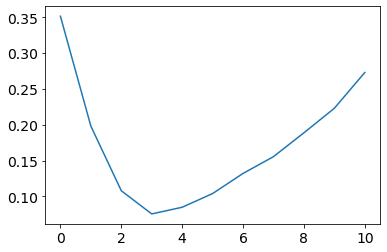

arrow_head (23.0) - | arrow_head: 21.0| triangle: 2.0  | 91.30434782608695%
triangle (23.0) - | triangle: 17.0| rectangle: 4.0| small_cross: 1.0| garbage: 1.0  | 73.91304347826087%
rectangle (22.0) - | triangle: 2.0| rectangle: 17.0| bracket: 1.0| ellipse: 2.0  | 77.27272727272727%
bracket (23.0) - | bracket: 18.0| curly_braces: 5.0  | 78.26086956521739%
small_cross (21.0) - | arrow_head: 8.0| small_cross: 13.0  | 61.904761904761905%
arrow (20.0) - | triangle: 1.0| rectangle: 2.0| arrow: 9.0| ellipse: 2.0| circle: 1.0| curly_braces: 3.0| garbage: 2.0  | 45.0%
ellipse (23.0) - | triangle: 6.0| rectangle: 3.0| ellipse: 13.0| circle: 1.0  | 56.52173913043478%
dot (21.0) - | dot: 20.0| circle: 1.0  | 95.23809523809524%
circle (19.0) - | triangle: 1.0| circle: 18.0  | 94.73684210526316%
curly_braces (22.0) - | curly_braces: 21.0| garbage: 1.0  | 95.45454545454545%
garbage (17.0) - | ellipse: 3.0| garbage: 14.0  | 82.3529411764706%


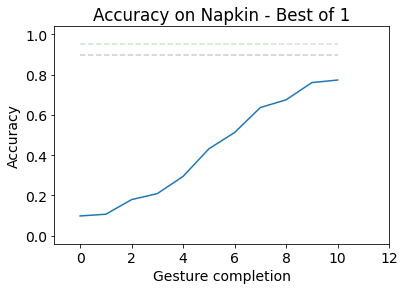

In [ ]:
if p.load_mode == 'train':
    with open(p.labelJsonPath, 'w') as fp:
        json.dump(dl.labels_dict, fp)
    model_mts.fit_model(dl.train_set_classifier,
                        dl.validation_set_classifier,
                        dl.train_set_regressor,
                        dl.validation_set_regressor)
else:
    print("loading model ...")
    model_mts.load_model()
    print('Model Loaded!!')
    graphic_manager.generate_progressive_accuracy(model_mts, dl.test_set_classifier, plot_clf=True, plot_reg=False,
                                                  best_of=1, indexToLabel=dl.get_index_to_label())

loading model ...
/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/checkpoints/models/Napkin_latest/mdcp_robust.ckpt
Model Loaded!!


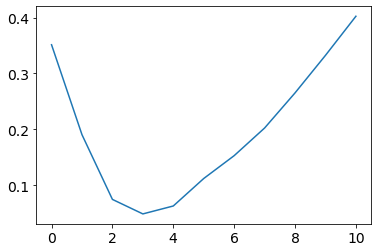

arrow_head (4.0) - | arrow_head: 4.0  | 100.0%
triangle (0.0) -   | nan%
rectangle (18.0) - | triangle: 1.0| rectangle: 12.0| arrow: 1.0| ellipse: 1.0| curly_braces: 3.0  | 66.66666666666667%
bracket (0.0) -   | nan%
small_cross (0.0) -   | nan%
arrow (11.0) - | arrow: 10.0| garbage: 1.0  | 90.9090909090909%
ellipse (0.0) -   | nan%
dot (0.0) -   | nan%
circle (13.0) - | ellipse: 3.0| circle: 10.0  | 76.92307692307692%
curly_braces (0.0) -   | nan%
garbage (0.0) -   | nan%


/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/GraphicManager.py:309: RuntimeWarning: invalid value encountered in double_scalars
  strng += "  | {}%".format((prediction_statistics[i, i] * 100) / np.sum(prediction_statistics[i, :]))


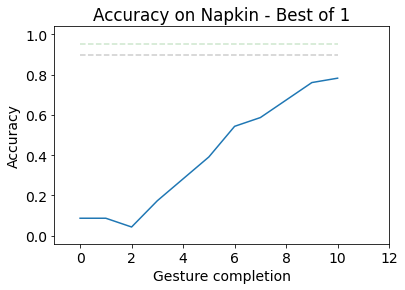

In [ ]:
if p.load_mode == 'train':
    with open(p.labelJsonPath, 'w') as fp:
        json.dump(dl.labels_dict, fp)
    model_mts.fit_model(dl.train_set_classifier,
                        dl.validation_set_classifier,
                        dl.train_set_regressor,
                        dl.validation_set_regressor)
else:
    print("loading model ...")
    model_mts.load_model()
    print('Model Loaded!!')
    graphic_manager.generate_progressive_accuracy(model_mts, dl.test_set_classifier, plot_clf=True, plot_reg=False,
                                                  best_of=1, indexToLabel=dl.get_index_to_label())

loading model ...
/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/checkpoints/models/Napkin_trial/mdcp_robust.ckpt
Model Loaded!!
--------Sample - 0----------
classification gt, [pred] 2 [2]
--------Sample - 1----------
classification gt, [pred] 2 [2]
--------Sample - 2----------
classification gt, [pred] 2 [2]
--------Sample - 3----------
classification gt, [pred] 2 [2]
--------Sample - 4----------
classification gt, [pred] 2 [2]
--------Sample - 5----------
classification gt, [pred] 2 [5]
--------Sample - 6----------
classification gt, [pred] 2 [2]
--------Sample - 7----------
classification gt, [pred] 2 [2]
--------Sample - 8----------
classification gt, [pred] 2 [2]
--------Sample - 9----------
classification gt, [pred] 2 [2]
--------Sample - 10----------
classification gt, [pred] 2 [2]
--------Sample - 11----------
classification gt, [pred] 2 [2]
--------Sample - 12----------
classification gt, [pred] 2 [5]
--------Sample - 13----------
classification gt, [pred] 2 [

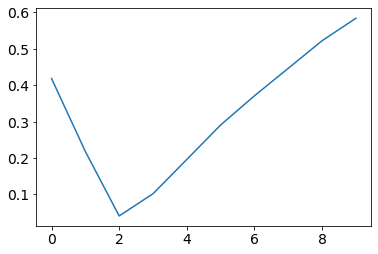

arrow_head (4.0) - | arrow_head: 1.0| triangle: 1.0| bracket: 1.0| circle: 1.0  | 25.0%
triangle (0.0) -   | nan%
rectangle (18.0) - | rectangle: 16.0| arrow: 2.0  | 88.88888888888889%
bracket (0.0) -   | nan%
small_cross (0.0) -   | nan%
arrow (11.0) - | rectangle: 2.0| arrow: 9.0  | 81.81818181818181%
ellipse (0.0) -   | nan%
dot (0.0) -   | nan%
circle (13.0) - | circle: 13.0  | 100.0%
curly_braces (0.0) -   | nan%


/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/GraphicManager.py:313: RuntimeWarning: invalid value encountered in double_scalars
  strng += "  | {}%".format((prediction_statistics[i, i] * 100) / np.sum(prediction_statistics[i, :]))


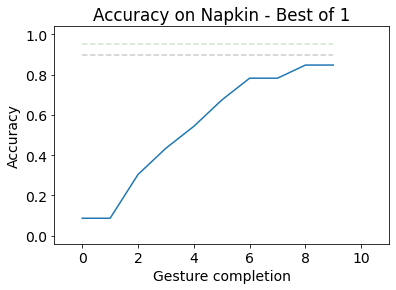

In [ ]:
#napkin trial
if p.load_mode == 'train':
    with open(p.labelJsonPath, 'w') as fp:
        json.dump(dl.labels_dict, fp)
    model_mts.fit_model(dl.train_set_classifier,
                        dl.validation_set_classifier,
                        dl.train_set_regressor,
                        dl.validation_set_regressor)
else:
    print("loading model ...")
    model_mts.load_model()
    print('Model Loaded!!')
    graphic_manager.generate_progressive_accuracy(model_mts, dl.test_set_classifier, plot_clf=True, plot_reg=False,
                                                  best_of=1, indexToLabel=dl.get_index_to_label())


loading model ...
/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/checkpoints/models/Napkin_trial/mdcp_robust.ckpt
Model Loaded!!
--------Sample - 0----------
classification gt, [pred] 3 [3]
--------Sample - 1----------
classification gt, [pred] 2 [2]
--------Sample - 2----------
classification gt, [pred] 5 [2]
--------Sample - 3----------
classification gt, [pred] 0 [0]
--------Sample - 4----------
classification gt, [pred] 0 [0]
--------Sample - 5----------
classification gt, [pred] 4 [0]
--------Sample - 6----------
classification gt, [pred] 5 [5]
--------Sample - 7----------
classification gt, [pred] 5 [5]
--------Sample - 8----------
classification gt, [pred] 3 [3]
--------Sample - 9----------
classification gt, [pred] 0 [1]
--------Sample - 10----------
classification gt, [pred] 7 [7]
--------Sample - 11----------
classification gt, [pred] 2 [1]
--------Sample - 12----------
classification gt, [pred] 7 [7]
--------Sample - 13----------
classification gt, [pred] 4 [

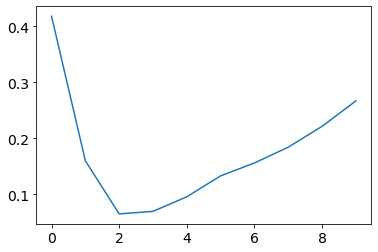

arrow_head (14.0) - | arrow_head: 11.0| triangle: 1.0| bracket: 1.0| dot: 1.0  | 78.57142857142857%
triangle (14.0) - | triangle: 12.0| rectangle: 1.0| circle: 1.0  | 85.71428571428571%
rectangle (20.0) - | triangle: 1.0| rectangle: 19.0  | 95.0%
bracket (18.0) - | rectangle: 3.0| bracket: 13.0| curly_braces: 2.0  | 72.22222222222223%
small_cross (6.0) - | arrow_head: 1.0| small_cross: 2.0| dot: 3.0  | 33.333333333333336%
arrow (17.0) - | rectangle: 2.0| arrow: 14.0| curly_braces: 1.0  | 82.3529411764706%
ellipse (8.0) - | triangle: 1.0| rectangle: 3.0| arrow: 1.0| ellipse: 2.0| circle: 1.0  | 25.0%
dot (8.0) - | dot: 8.0  | 100.0%
circle (12.0) - | triangle: 2.0| rectangle: 1.0| circle: 9.0  | 75.0%
curly_braces (10.0) - | rectangle: 1.0| curly_braces: 9.0  | 90.0%


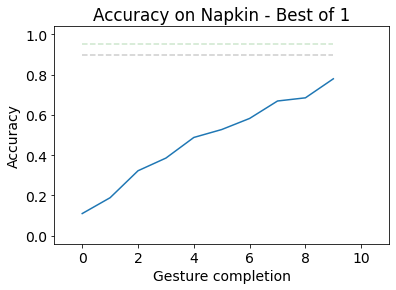

In [ ]:
if p.load_mode == 'train':
    with open(p.labelJsonPath, 'w') as fp:
        json.dump(dl.labels_dict, fp)
    model_mts.fit_model(dl.train_set_classifier,
                        dl.validation_set_classifier,
                        dl.train_set_regressor,
                        dl.validation_set_regressor)
else:
    print("loading model ...")
    model_mts.load_model()
    print('Model Loaded!!')
    graphic_manager.generate_progressive_accuracy(model_mts, dl.test_set_classifier, plot_clf=True, plot_reg=False,
                                                  best_of=1, indexToLabel=dl.get_index_to_label())


loading model ...
/content/drive/MyDrive/second_layer_ai_model/SketchAI/SketchAI/checkpoints/models/Napkin_trial/mdcp_robust.ckpt
Model Loaded!!
--------Sample - 0----------
classification gt, [pred] 9 [9]
--------Sample - 1----------
classification gt, [pred] 1 [2]
--------Sample - 2----------
classification gt, [pred] 8 [8]
--------Sample - 3----------
classification gt, [pred] 2 [8]
--------Sample - 4----------
classification gt, [pred] 2 [2]
--------Sample - 5----------
classification gt, [pred] 6 [6]
--------Sample - 6----------
classification gt, [pred] 3 [2]
--------Sample - 7----------
classification gt, [pred] 9 [9]
--------Sample - 8----------
classification gt, [pred] 4 [0]
--------Sample - 9----------
classification gt, [pred] 8 [8]
--------Sample - 10----------
classification gt, [pred] 5 [5]
--------Sample - 11----------
classification gt, [pred] 8 [8]
--------Sample - 12----------
classification gt, [pred] 7 [7]
--------Sample - 13----------
classification gt, [pred] 1 [

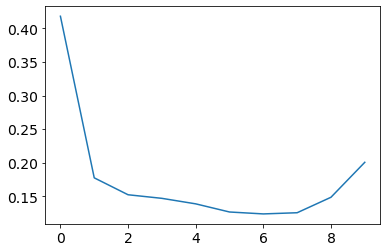

arrow_head (22.0) - | arrow_head: 14.0| dot: 7.0| circle: 1.0  | 63.63636363636363%
triangle (25.0) - | triangle: 10.0| rectangle: 15.0  | 40.0%
rectangle (20.0) - | rectangle: 16.0| bracket: 1.0| arrow: 1.0| circle: 2.0  | 80.0%
bracket (23.0) - | rectangle: 2.0| bracket: 14.0| curly_braces: 7.0  | 60.869565217391305%
small_cross (21.0) - | arrow_head: 8.0| triangle: 1.0| rectangle: 1.0| bracket: 1.0| small_cross: 6.0| arrow: 1.0| dot: 2.0| circle: 1.0  | 28.571428571428573%
arrow (24.0) - | rectangle: 7.0| arrow: 14.0| circle: 2.0| curly_braces: 1.0  | 58.333333333333336%
ellipse (21.0) - | triangle: 3.0| rectangle: 7.0| ellipse: 8.0| circle: 3.0  | 38.095238095238095%
dot (20.0) - | arrow_head: 1.0| small_cross: 1.0| dot: 18.0  | 90.0%
circle (22.0) - | dot: 1.0| circle: 21.0  | 95.45454545454545%
curly_braces (20.0) - | bracket: 3.0| arrow: 3.0| curly_braces: 14.0  | 70.0%


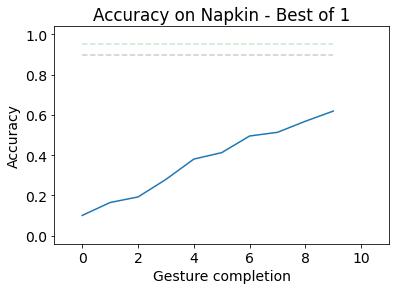

In [ ]:
if p.load_mode == 'train':
    with open(p.labelJsonPath, 'w') as fp:
        json.dump(dl.labels_dict, fp)
    model_mts.fit_model(dl.train_set_classifier,
                        dl.validation_set_classifier,
                        dl.train_set_regressor,
                        dl.validation_set_regressor)
else:
    print("loading model ...")
    model_mts.load_model()
    print('Model Loaded!!')
    graphic_manager.generate_progressive_accuracy(model_mts, dl.test_set_classifier, plot_clf=True, plot_reg=False,
                                                  best_of=1, indexToLabel=dl.get_index_to_label())


In [ ]:
print(tf.__version__)

In [ ]:
from numpy.random import seed

seed(0)
from tensorflow import random

random.set_seed(0)

import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Masking, Input, concatenate,LeakyReLU
import matplotlib.pyplot as plt
import json

class GestuReNN_GRU:

    def __init__(self, labelJsonPath='', plot=True, include_fingerup=False, use_tangents=False, batch_size=128,
                 model_path=None):
        self.model_with_state = None
        self.plot = plot
        self.use_tangents = use_tangents

        if labelJsonPath is not None:
            self.gesture_dict_1dollar = json.load(open(labelJsonPath, 'r'))
        else:
            self.gesture_dict_1dollar = {
                0: 'arrow', 1: 'caret', 2: 'check', 3: 'O',
                4: 'delete', 5: '{', 6: '[', 7: 'pig-tail',
                8: '?', 9: 'rectangle', 10: '}', 11: ']',
                12: 'star', 13: 'triangle', 14: 'V', 15: 'X'
            }

        # Hyper parameters for optimizing
        self.n_labels = len(self.gesture_dict_1dollar)
        print("----#classes = {}------".format(self.n_labels))
        self.metrics = [tf.keras.metrics.SparseCategoricalAccuracy(),
                        tf.keras.metrics.MeanAbsoluteError()]  # ['accuracy']
        # self.loss_clf = 'sparse_categorical_crossentropy'
        # self.loss_reg = 'mse'
        self.loss_clf = tf.keras.losses.SparseCategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE)
        self.loss_reg = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
        self.batch_size = batch_size
        self.epochs = 1000
        # self.opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5, beta_1=0.8, beta_2=0.85)
        self.opt = tf.keras.optimizers.Adam(learning_rate=1e-4, decay=1e-5, beta_1=0.8, beta_2=0.85)

        # Setting up checkpoint root
        root = "checkpoints/models/mts"

        # Checkpoints
        self.model_path = root if model_path is None else model_path + "/mdcp_robust.ckpt"

        # Loss figure settings
        self.loss_model_path = root if model_path is None else model_path + "/loss_joined_robust.png"

        # model parameters
        self.lstm1_hid_dim = 64
        self.lstm2_hid_dim = 32

        self.tup = 2  # 2
        if include_fingerup:
            self.tup += 1
        if self.use_tangents:
            self.tup += 2

        # Joined model
        visible = Input(shape=(None, self.tup), name='Input')
        mask = Masking(mask_value=0, name='Masking')(visible)
        lstm1 = GRU(self.lstm1_hid_dim, input_shape=(None, self.tup), return_sequences=True, reset_after=False, activation=LeakyReLU(alpha=0.1),
                    name='Gate1')(mask)
        drop1 = Dropout(0.1, name='Reg1', seed=0)(lstm1)

        lstm_clf = GRU(self.lstm2_hid_dim, input_shape=(None, self.tup), return_sequences=True, reset_after=False, activation=LeakyReLU(alpha=0.1),
                       name='Gate_Clf')(drop1)
        # drop_clf = Dropout(0.2, name='Drop_Clf', seed=0)(lstm_clf)
        output1 = Dense(self.n_labels, activation='softmax', name='Clf')(lstm_clf)

        lstm_reg = GRU(self.lstm2_hid_dim, input_shape=(None, self.tup), return_sequences=True, reset_after=False, activation=LeakyReLU(alpha=0.1),
                       name='Gate_Reg')(drop1)
        # drop_reg = Dropout(0.2, name='Drop_Reg', seed=0)(lstm_reg)
        output2 = Dense(1, activation='sigmoid', name='Reg')(lstm_reg)

        self.model = Model(inputs=[visible], outputs=[output1, output2])
        # self.model.compile(loss=[self.loss_clf, self.loss_reg], optimizer=self.opt, metrics=self.metrics)
        self.model.compile(loss=[self.custom_loss_clf, self.custom_loss_reg], optimizer=self.opt, metrics=None)

    def custom_loss_clf(self, y_clf_gt, y_clf_pred):
        y0_gt = tf.expand_dims(y_clf_gt[:, :, 0], axis=2, name=None)
        loss = self.loss_clf(y0_gt, y_clf_pred) * y_clf_gt[:, :, 1]
        loss = tf.reduce_sum(loss)
        return loss

    def custom_loss_reg(self, y_reg_gt, y_reg_pred):
        y_gt = tf.squeeze(y_reg_gt, axis=2)
        loss = self.loss_reg(y_reg_gt, y_reg_pred) * y_gt
        loss = tf.reduce_sum(loss)
        return loss

    def custom_metric(self, y_true, y_pred):
        metric = None
        if y_true.shape[-1] == 2:
            metric = self.metrics[0](y_true[:, :, 0], y_pred)
        else:
            metric = self.metrics[1](y_true, y_pred)
        return metric

    def concatenate(self, y_clf, y_reg):
        y_clf = np.expand_dims(y_clf, axis=2)
        y_clf = np.concatenate((y_clf, y_reg), axis=2)
        return y_clf

    def fit_model(self, train_clf, test_clf, train_reg, test_reg):

        (x_train, y_train_clf), (x_test, y_test_clf) = train_clf, test_clf
        (_, y_train_reg), (_, y_test_reg) = train_reg, test_reg

        # Setting up the checkpoint
        cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=self.model_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         monitor="val_Clf_loss",
                                                         mode="min",
                                                         verbose=1)
        y_train_clf = self.concatenate(y_train_clf, y_train_reg)
        y_test_clf = self.concatenate(y_test_clf, y_test_reg)
        print("y_train_clf shape - {} \n y_test_clf shape - {}".format(y_train_clf.shape, y_test_clf.shape))
        # Training the net
        history = self.model.fit(x_train, {"Clf": y_train_clf, "Reg": y_train_reg},
                                 epochs=self.epochs,
                                 batch_size=self.batch_size,
                                 validation_data=(x_test, {"Clf": y_test_clf, "Reg": y_test_reg}),
                                 callbacks=[cp_callback])

        # Plotting the losses
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.savefig(self.loss_model_path)
        if self.plot:
            plt.show()
        plt.clf()

    def load_model(self):
        print(self.model_path)
        self.model.load_weights(self.model_path)